**Import packages**

In [13]:
import random
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [29]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Create helper functions**

In [15]:
def plot_sample_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    classes = ["0","1","2","3","4","5","6","7","8","9"]
    plt.xlabel('Image Label: {}'.format(classes[y[index]]))

def classification_results(X_test,y_test,y_pred_classes):
  from sklearn.metrics import confusion_matrix , classification_report
  import seaborn as sn

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
  plt.figure(figsize = (7,5))
  sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.xlabel('Predicted');
  plt.ylabel('Truth');

  print("Classification Report: \n", classification_report(y_test, y_pred_classes))

def plot_fitting_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epoch #' )
  plt.legend(['Training','Validation'])
  plt.show()

**Plot sample image**

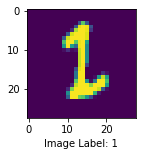

In [16]:
plot_sample_image(X_train, y_train, np.random.randint(100))

**Normalize the input data**

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Linear Classifier

**Fit the model**

In [18]:
from sklearn.linear_model import LogisticRegression
C_linear = LogisticRegression()
C_linear.fit(X_train.reshape(X_train.shape[0],-1,), y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Check testing accuracy**

In [19]:
C_linear.score(X_test.reshape(X_test.shape[0],-1,), y_test)

0.9258

**Report classification performance & plot confusion matrix**

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



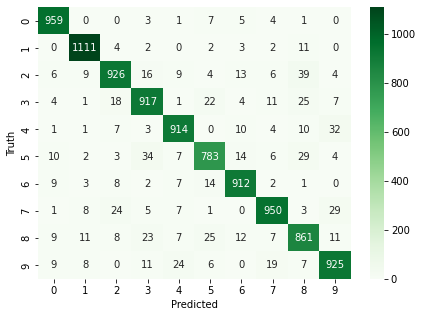

In [20]:
y_pred_classes = C_linear.predict(X_test.reshape(X_test.shape[0],-1,))
classification_results(X_test,y_test,y_pred_classes)

# MLP (multi-layer perceptron) classifier 

**Fit the model**

In [21]:
import random
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

C_MLP = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(2**6, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

C_MLP.summary()

learning_rate =  0.001
C_MLP.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_C_MLP = C_MLP.fit(X_train, y_train, epochs=50, batch_size=512, shuffle=True,
            validation_split = 0.2, callbacks = early_callbacks, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - 3s 6ms/step - loss: 0.7982 - accuracy: 0.7922 - val_loss: 0.3549 - val_accuracy: 0.9061
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.9095 - val_loss: 0.2738 - val_accuracy: 0.9234
Epoch 3/50
94/94 [==================

**Check testing accuracy**

In [22]:
C_MLP.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9726


[0.09884212911128998, 0.972599983215332]

**Plot training and validation loss**

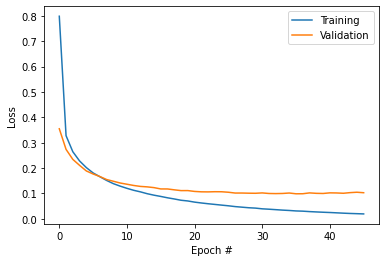

In [23]:
plot_fitting_history(history_C_MLP)

**Report classification performance & plot confusion matrix**

313/313 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



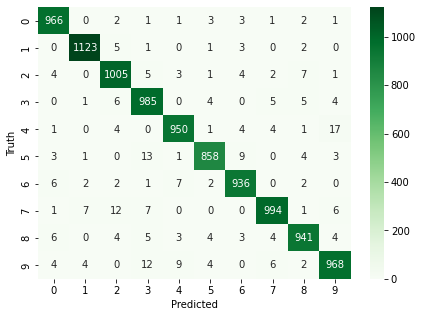

In [24]:
y_pred = C_MLP.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_results(X_test,y_test,y_pred_classes)

# CNN (convolutional neuaral network) Classifier

**Fit the model**

In [25]:
import random
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

C_CNN = models.Sequential([
    layers.Conv2D(filters=2**4, kernel_size=(3, 3), padding = 'same', strides = (1,1), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(2**4, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C_CNN.summary()

learning_rate =  0.001
C_CNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_C_CNN = C_CNN.fit(X_train, y_train, epochs=50, batch_size=512, shuffle=True,
            validation_split = 0.2, callbacks = early_callbacks, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                50192     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 50,522
Trainable params: 50,522
Non-trainable params: 0
__________________________________________________

**Check testing accuracy**

In [26]:
C_CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0638 - accuracy: 0.9827


[0.06378435343503952, 0.982699990272522]

**Plot training and validation loss**

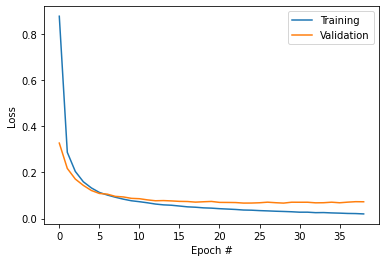

In [27]:
plot_fitting_history(history_C_CNN)

**Report classification performance & plot confusion matrix**

313/313 [==============================] - 1s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



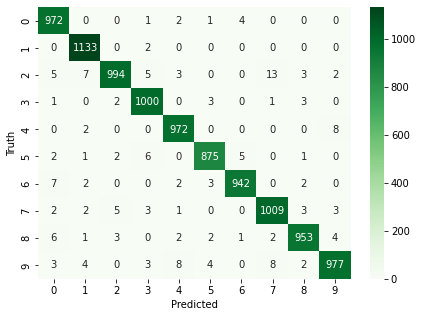

In [28]:
y_pred = C_CNN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_results(X_test,y_test,y_pred_classes)